In [25]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

In [26]:
ETF_list = [
  ["SPY", "SPY"],
  ["TLT", "TLT"],
  ["ks11", "KS11"],
  ["IAU", "IAU"],
  ["SCHP", "SCHP"],
  ["btc", "BTC/KRW"],
  ["QQQ", "QQQ"]
]

In [27]:
def get_df(asset_list):
    df_list = [fdr.DataReader(code, '2008-01-01', '2020-11-30')['Close'] for name, code in asset_list]
    df = pd.concat(df_list, axis=1)
    df.columns = [name for name, code in asset_list]
    print(df)
    return df

---
## 1. Return analysis 

In [28]:
def log_return(df):
    return np.log(df / df.shift(1)) * 100

In [29]:
ETF_df = get_df(ETF_list)

               SPY     TLT     ks11    IAU   SCHP         btc     QQQ
Date                                                                 
2008-01-02  144.93     NaN  1853.45   8.49    NaN         NaN     NaN
2008-01-03  144.86     NaN  1852.73   8.56    NaN         NaN     NaN
2008-01-04  141.31     NaN  1863.90   8.53    NaN         NaN     NaN
2008-01-07  141.19     NaN  1831.14   8.49    NaN         NaN     NaN
2008-01-08  138.91     NaN  1826.23   8.69    NaN         NaN     NaN
...            ...     ...      ...    ...    ...         ...     ...
2020-11-26     NaN     NaN  2625.91    NaN    NaN  19248000.0     NaN
2020-11-27  363.67  160.22  2633.45  17.04  61.46  19119000.0  299.01
2020-11-28     NaN     NaN      NaN    NaN    NaN  19480000.0     NaN
2020-11-29     NaN     NaN      NaN    NaN    NaN  20002000.0     NaN
2020-11-30     NaN     NaN  2591.34    NaN    NaN  20333000.0     NaN

[3722 rows x 7 columns]


In [30]:
ETF_return = log_return(ETF_df)

Text(0, 0.5, 'Log Returns')

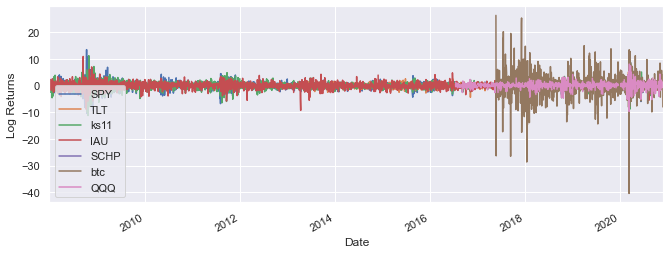

In [31]:
## Log returns of stock & ETF
sns.set(rc={'figure.figsize':(11,4)})
ETF_return.plot()
plt.ylabel("Log Returns")

Text(0, 0.5, 'Cumulative returns')

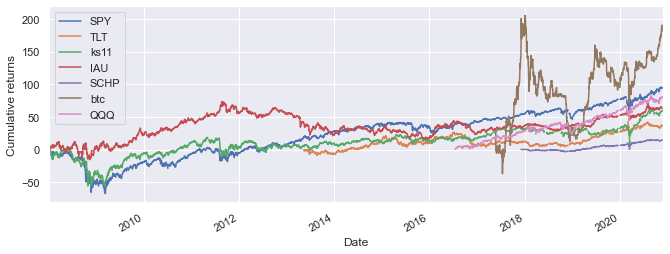

In [32]:
## Cumulative returns
plt.close()
sns.set(rc={'figure.figsize':(11,4)})
np.cumsum(ETF_return).plot()
plt.ylabel("Cumulative returns")

In [33]:
def sharp(rt):
    return rt / rt.std()

#### Mean sharp ####
SPY     0.024058
TLT     0.025295
ks11    0.016588
IAU     0.018075
SCHP    0.065813
btc     0.034324
QQQ     0.068253
dtype: float64
#### Peack sharp ####


SPY     10.376661
TLT      8.466321
ks11     9.101464
IAU      9.522303
SCHP    11.704131
btc      6.203993
QQQ      6.162764
dtype: float64

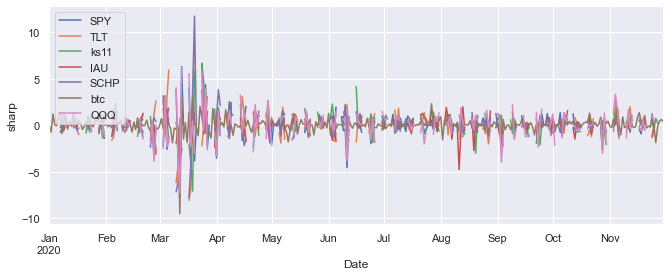

In [34]:
## Sharp
sns.set(rc={'figure.figsize':(11,4)})
sharp(ETF_return).loc['2020'].plot()
plt.ylabel("sharp")

print("#### Mean sharp ####")
print(ETF_return.mean() / ETF_return.std())
print("#### Peack sharp ####")
sharp(ETF_return).max()

- Sharp 에 mean 값과 return 의 모든 값을 넣었을 때의 최대값 과 괴리가 심함 어떤게 맞는지  
---

## 2. Resample & Interpolate data

In [35]:
def resample(df,mode="Linear_interpolate"):
    resample_df = df.resample('D').mean()
    if mode == "Linear_interpolate":
        rsp_df = resample_df.interpolate(method='values')
    else:
        rsp_df = resample_df
    return rsp_df

In [36]:
def minMaxScale(obj):
    return (obj - obj.min()) / (obj.max() - obj.min())

In [39]:
billed_rsp_df = resample(ETF_df)
normed_df = minMaxScale(billed_rsp_df)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

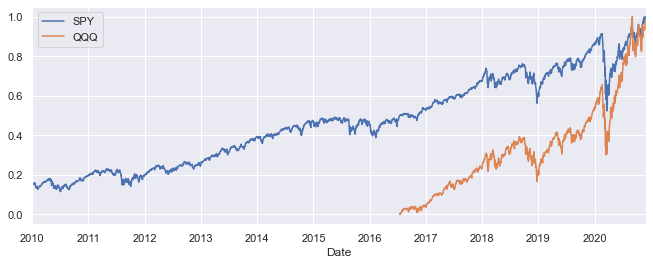

In [57]:
normed_df['SPY'].loc['2010':].plot()
#normed_df['TLT'].loc['2019':].plot()
normed_df['QQQ'].loc['2010':].plot()
#normed_df['btc'].loc['2019':].plot()
plt.legend()

In [38]:
import scipy.stats as stats

In [40]:
for s1 in ETF_list:
    l1=[]
    for s2 in ETF_list:
        r,_ = stats.pearsonr(billed_rsp_df.dropna()[s1[0]], billed_rsp_df.dropna()[s2[0]])
        l1.append(r)
        
        print('Corr of {0},{1} = {2}'.format(s1[0],s2[0],r))

Corr of SPY,SPY = 0.9999999999999999
Corr of SPY,TLT = 0.6223922523740331
Corr of SPY,ks11 = 0.17604353395336095
Corr of SPY,IAU = 0.7508875601619496
Corr of SPY,SCHP = 0.7861558878084471
Corr of SPY,btc = 0.44637771949936156
Corr of SPY,QQQ = 0.9067187012868387
Corr of TLT,SPY = 0.6223922523740331
Corr of TLT,TLT = 1.0
Corr of TLT,ks11 = -0.3024843842832956
Corr of TLT,IAU = 0.9414046625658018
Corr of TLT,SCHP = 0.940983149599898
Corr of TLT,btc = 0.4261170820885395
Corr of TLT,QQQ = 0.8214953166944452
Corr of ks11,SPY = 0.17604353395336095
Corr of ks11,TLT = -0.3024843842832956
Corr of ks11,ks11 = 1.0
Corr of ks11,IAU = -0.07300864099187845
Corr of ks11,SCHP = -0.036571415471170314
Corr of ks11,btc = 0.3390796453130495
Corr of ks11,QQQ = 0.06446195750722773
Corr of IAU,SPY = 0.7508875601619496
Corr of IAU,TLT = 0.9414046625658018
Corr of IAU,ks11 = -0.07300864099187845
Corr of IAU,IAU = 1.0
Corr of IAU,SCHP = 0.9710890722648724
Corr of IAU,btc = 0.4744268979046151
Corr of IAU,QQQ = 0

---

### case study 1: Low USD hedging   
달러의 헷징 수단으로 BCI,PDBC 가 좋으나 변동성과 수익률을 보면 잠깐 넣었다가 빼는게 답

In [18]:
USD_COM=[
    ["USD/KRW","USD/KRW"],
    ["GSG","GSG"],
    ["BCI","BCI"],
    ["DBC","DBC"],
    ["PDBC","PDBC"]
]

In [19]:
USD_COM_df = get_df(USD_COM)

            USD/KRW    GSG    BCI    DBC   PDBC
Date                                           
2008-01-01   936.10    NaN    NaN    NaN    NaN
2008-01-02   936.95  54.66    NaN  32.43    NaN
2008-01-03   936.50  54.66    NaN  32.68    NaN
2008-01-04   938.45  54.30    NaN  32.49    NaN
2008-01-07   940.70  52.68    NaN  31.90    NaN
...             ...    ...    ...    ...    ...
2020-11-25  1106.21  11.70  21.08  14.05  14.61
2020-11-26  1105.57    NaN    NaN    NaN    NaN
2020-11-27  1104.43  11.69  21.07  14.02  14.59
2020-11-29  1105.04    NaN    NaN    NaN    NaN
2020-11-30  1106.76    NaN    NaN    NaN    NaN

[3396 rows x 5 columns]


In [20]:
USD_COM_return =log_return(USD_COM_df)
USD_COM_rsp = resample(USD_COM_df)
USD_COM_normed = minMaxScale(USD_COM_rsp)

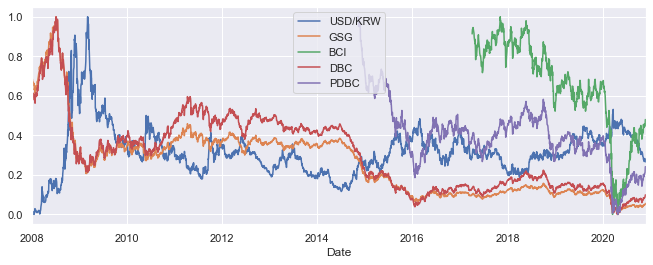

In [23]:
plt.close()
sns.set(rc={'figure.figsize':(11,4)})
USD_COM_normed.plot()

In [11]:
print(" ### RISK ###")
print(USD_COM_return.std())
print(" ### Sharp ###")
print(USD_COM_return.mean())

 ### RISK ###
USD/KRW    0.740041
GSG        1.509562
BCI        0.890489
DBC        1.209723
PDBC       1.070507
dtype: float64
 ### Sharp ###
USD/KRW    0.004513
GSG       -0.033958
BCI       -0.011618
DBC       -0.018195
PDBC      -0.012602
dtype: float64


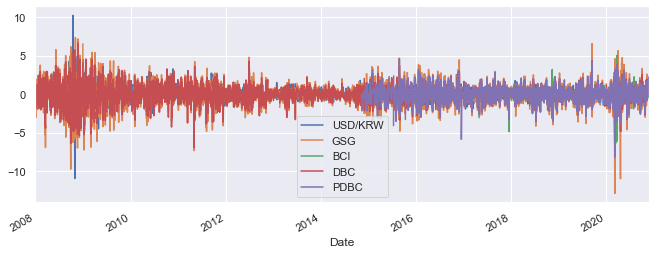

In [14]:
plt.close()
sns.set(rc={'figure.figsize':(11,4)})
USD_COM_return.plot()

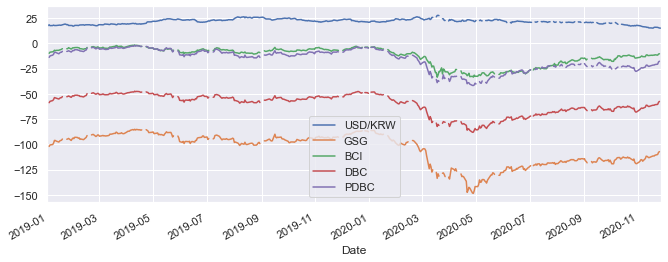

In [16]:
plt.close()
sns.set(rc={'figure.figsize':(11,4)})
np.cumsum(USD_COM_return).loc['2019':].plot()

---
### case study 2: Portfolio building  

In [51]:
Portfolio_list = [
  ["TLT", "TLT"],
  ["ks11", "KS11"],
  ["IAU", "IAU"],
  ["SCHP", "SCHP"],
  ["btc", "BTC/KRW"],
  ["QQQ", "QQQ"],
  ["BCI","BCI"]
]

In [52]:
PF_df = get_df(Portfolio_list)

               TLT     ks11    IAU   SCHP         btc     QQQ    BCI
Date                                                                
2008-01-02     NaN  1853.45   8.49    NaN         NaN     NaN    NaN
2008-01-03     NaN  1852.73   8.56    NaN         NaN     NaN    NaN
2008-01-04     NaN  1863.90   8.53    NaN         NaN     NaN    NaN
2008-01-07     NaN  1831.14   8.49    NaN         NaN     NaN    NaN
2008-01-08     NaN  1826.23   8.69    NaN         NaN     NaN    NaN
...            ...      ...    ...    ...         ...     ...    ...
2020-11-26     NaN  2625.91    NaN    NaN  19248000.0     NaN    NaN
2020-11-27  160.22  2633.45  17.04  61.46  19119000.0  299.01  21.07
2020-11-28     NaN      NaN    NaN    NaN  19480000.0     NaN    NaN
2020-11-29     NaN      NaN    NaN    NaN  20002000.0     NaN    NaN
2020-11-30     NaN  2591.34    NaN    NaN  20357000.0     NaN    NaN

[3722 rows x 7 columns]


In [54]:
PF_df_return = log_return(PF_df)

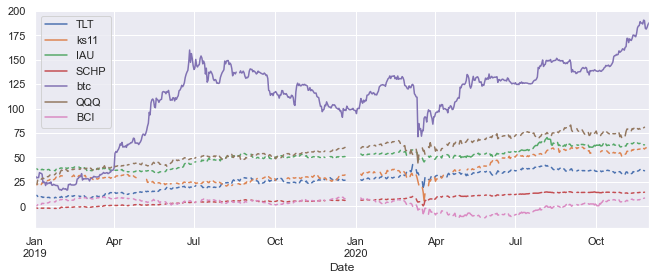

In [55]:
plt.close()
sns.set(rc={'figure.figsize':(11,4)})
np.cumsum(PF_df_return).loc['2019':].plot()

1) -- 인플레이션 헷징 + 디플레이션 헷징 --  
 - TLT 2  
 - SCHP 8   

2) -- 주식 --  
 - ks11 3  
 - QQQ  7  

3) -- 금/암호화폐 --  
 - IAU 9  
 - btc 1  


4) -- 디플레이션 헷징--  
 - USD 4  
 - WON 6  
 ---
 - 1) 4
 - 2) 3
 - 3) 1
 - 4) 2 

In [58]:
def Numb1(rat):
    TLT= rat*0.2
    SCHP = rat*0.8
    print("TLT: ",TLT)
    print("SCHHP: ",SCHP)
    return(TLT,SCHP)

def Numb2(rat):
    KOSPI= rat*0.3
    QQQ = rat*0.7
    print("KOSPI: ",KOSPI)
    print("QQQ: ",QQQ)
    return(KOSPI,QQQ)

def Numb3(rat):
    IAU = rat*0.9
    BTC = rat*0.1
    print("IAU: ",IAU)
    print("BTC: ",BTC)
    return(IAU,BTC)

def Numb4(rat):
    USD= rat*0.4
    WON = rat*0.6
    print("USD: ",USD)
    print("WON: ",WON)
    return(USD,WON)

In [69]:
w_TLT,w_SCHP = Numb1(4)
w_ks11,w_QQQ = Numb2(3)
w_IAU,w_BTC = Numb3(1)
w_USD,w_WON = Numb4(2)

TLT:  0.8
SCHHP:  3.2
KOSPI:  0.8999999999999999
QQQ:  2.0999999999999996
IAU:  0.9
BTC:  0.1
USD:  0.8
WON:  1.2


In [64]:
PF_df_return.columns

Index(['TLT', 'ks11', 'IAU', 'SCHP', 'btc', 'QQQ', 'BCI'], dtype='object')

In [70]:
TLT_weighted = PF_df_return['TLT'] * w_TLT
SCHP_weighted = PF_df_return['SCHP'] * w_SCHP
KOSPI_weighted = PF_df_return['ks11'] * w_ks11
QQQ_weighted = PF_df_return['QQQ'] * w_QQQ
IAU_weighted = PF_df_return['IAU'] * w_IAU
BTC_weighted = PF_df_return['btc'] * w_BTC

In [71]:
Portfolio_return =  TLT_weighted + SCHP_weighted + KOSPI_weighted + QQQ_weighted + IAU_weighted + BTC_weighted

In [93]:
print(Portfolio_return.loc['2020'])
print(ETF_return.loc['2020'])

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03    2.542288
2020-01-04         NaN
2020-01-05         NaN
                ...   
2020-11-26         NaN
2020-11-27         NaN
2020-11-28         NaN
2020-11-29         NaN
2020-11-30         NaN
Length: 335, dtype: float64
                 SPY       TLT      ks11      IAU      SCHP       btc  \
Date                                                                    
2020-01-01       NaN       NaN       NaN      NaN       NaN -0.036116   
2020-01-02       NaN       NaN       NaN      NaN       NaN -3.168267   
2020-01-03 -0.760107  1.528295  0.059288  1.35964  0.455981  5.159153   
2020-01-04       NaN       NaN       NaN      NaN       NaN  0.082591   
2020-01-05       NaN       NaN       NaN      NaN       NaN -0.224334   
...              ...       ...       ...      ...       ...       ...   
2020-11-26       NaN       NaN  0.932393      NaN       NaN -7.961100   
2020-11-27       NaN       NaN  0.286727      NaN       N

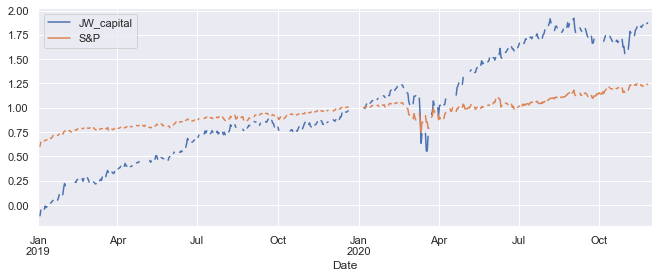

In [114]:
plt.close()
sns.set(rc={'figure.figsize':(11,4)})
(np.cumsum(Portfolio_return).loc['2019':] / np.cumsum(Portfolio_return).loc['2020-01-03']).plot(label='JW_capital')
(np.cumsum(ETF_return['SPY']).loc['2019':] / np.cumsum(ETF_return['SPY']).loc['2020-01-03']).plot(label='S&P')
plt.legend()

In [109]:
print("=== Mean Sharp index:  Returns / Risk ===")
print("JW capital",Portfolio_return.mean() / Portfolio_return.std())
print("S&P index",ETF_return['SPY'].mean() / ETF_return['SPY'].std())

=== Mean Sharp index:  Returns / Risk ===
JW capital 0.1008871227816079
S&P index 0.02405773317126739
